# Seguro de automóveis da Suécia

## Definição do Problema

O dataset é composto por:
X = Número de reivindicações
Y = total pago por todas as reivindicações em mil coroas suecas.

Atributo de predição: y

### Importação das bibliotecas

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import ensemble
from sklearn import tree
from sklearn import svm
from sklearn import neighbors
from sklearn import naive_bayes

from sklearn import preprocessing

### Carregando e definindo as colunas do dataset

In [29]:
columns = ["X", "y"]
data = pd.read_csv('dataset.csv',names=columns, sep='\t')

### Visualização e descrição dos dados

In [30]:
data.head(10)

,X,y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
5,57,170.9
6,23,56.9
7,14,77.5
8,45,214.0
9,10,65.3


In [31]:
data.describe()

,X,y
count,63.000000,63.000000
mean,22.904762,98.187302
std,23.351946,87.327553
min,0.000000,0.000000
25%,7.500000,38.850000
50%,14.000000,73.400000
75%,29.000000,140.000000
max,124.000000,422.200000


In [32]:
print(data.shape)

(63, 2)


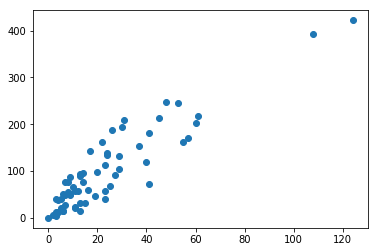

In [33]:
plt.scatter(data.values[:,0],data.values[:,1]);

In [34]:
data.corr()

,X,y
X,1.000000,0.912878
y,0.912878,1.000000


### Criação do dataset de validação 

In [35]:
dataset = data.values
print(dataset)

[[ 108.   392.5]
 [  19.    46.2]
 [  13.    15.7]
 [ 124.   422.2]
 [  40.   119.4]
 [  57.   170.9]
 [  23.    56.9]
 [  14.    77.5]
 [  45.   214. ]
 [  10.    65.3]
 [   5.    20.9]
 [  48.   248.1]
 [  11.    23.5]
 [  23.    39.6]
 [   7.    48.8]
 [   2.     6.6]
 [  24.   134.9]
 [   6.    50.9]
 [   3.     4.4]
 [  23.   113. ]
 [   6.    14.8]
 [   9.    48.7]
 [   9.    52.1]
 [   3.    13.2]
 [  29.   103.9]
 [   7.    77.5]
 [   4.    11.8]
 [  20.    98.1]
 [   7.    27.9]
 [   4.    38.1]
 [   0.     0. ]
 [  25.    69.2]
 [   6.    14.6]
 [   5.    40.3]
 [  22.   161.5]
 [  11.    57.2]
 [  61.   217.6]
 [  12.    58.1]
 [   4.    12.6]
 [  16.    59.6]
 [  13.    89.9]
 [  60.   202.4]
 [  41.   181.3]
 [  37.   152.8]
 [  55.   162.8]
 [  41.    73.4]
 [  11.    21.3]
 [  27.    92.6]
 [   8.    76.1]
 [   3.    39.9]
 [  17.   142.1]
 [  13.    93. ]
 [  13.    31.9]
 [  15.    32.1]
 [   8.    55.6]
 [  29.   133.3]
 [  30.   194.5]
 [  24.   137.9]
 [   9.    87.

In [36]:
np.random.seed(1)
np.random.shuffle(dataset)
dataset

array([[  29. ,  103.9],
       [  16. ,   59.6],
       [  13. ,   93. ],
       [  20. ,   98.1],
       [  53. ,  244.6],
       [  13. ,   15.7],
       [   9. ,   48.7],
       [  41. ,  181.3],
       [  60. ,  202.4],
       [  55. ,  162.8],
       [   4. ,   12.6],
       [  15. ,   32.1],
       [  11. ,   57.2],
       [   4. ,   11.8],
       [  30. ,  194.5],
       [   8. ,   76.1],
       [ 124. ,  422.2],
       [  13. ,   89.9],
       [  61. ,  217.6],
       [   5. ,   20.9],
       [  29. ,  133.3],
       [  23. ,  113. ],
       [  22. ,  161.5],
       [  31. ,  209.8],
       [   6. ,   50.9],
       [   8. ,   55.6],
       [  13. ,   31.9],
       [  27. ,   92.6],
       [   5. ,   40.3],
       [  17. ,  142.1],
       [  25. ,   69.2],
       [   9. ,   87.4],
       [  23. ,   39.6],
       [   9. ,   52.1],
       [   6. ,   14.6],
       [   0. ,    0. ],
       [   3. ,   39.9],
       [   3. ,   13.2],
       [  40. ,  119.4],
       [   7. ,   48.8],


In [37]:
X = dataset[:,0]
X = [ [x] for x in  X]
X = np.array(X)
y = dataset[:,1]

In [49]:
n_train = int(round(len(y) * 0.70))
lab_enc = preprocessing.LabelEncoder()
X_train = lab_enc.fit_transform(X[:n_train,:])
X_train = X_train.reshape(X_train.size,1)
y_train = lab_enc.fit_transform(y[:n_train])
X_test = lab_enc.fit_transform(X[n_train:,:])
X_test = X_test.reshape(X_test.size,1)
y_test = lab_enc.fit_transform(y[n_train:])

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [50]:
X.shape, y.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((63, 1), (63,), (44, 1), (44,), (19, 1), (19,))

### Criação dos modelos

#### Classificadores utilizados:

- DecisionTreeClassifier
- SVC
- KNN
- Logistic Regression
- Naive Bayes
- SGDClassifier
- RandomForest
- GradientBoosting

In [62]:
resultados = {}
resultados['DTC'] = { 'model': tree.DecisionTreeClassifier() }
resultados['SVC'] = { 'model': svm.SVC() }
resultados['KNN'] = { 'model': neighbors.KNeighborsClassifier() }
resultados['LOR'] = { 'model': linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg') }
resultados['LR'] = {'model': linear_model.LinearRegression()}
resultados['NB'] = { 'model':  naive_bayes.GaussianNB() }
resultados['SGD'] = { 'model': linear_model.SGDClassifier() }
resultados['RF'] = { 'model': ensemble.RandomForestClassifier() }
resultados['GB'] = { 'model': ensemble.GradientBoostingClassifier() }

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [63]:
for key in resultados:
    print('processando {}...'.format(key))
    resultados[key]['model'].fit(X_train, y_train)
    resultados[key]['y_pred'] = resultados[key]['model'].predict(X_test)
    resultados[key]['mse'] = metrics.mean_squared_error(y_test, resultados[key]['y_pred'])
    resultados[key]['rmse'] = np.sqrt(resultados[key]['mse'])
    resultados[key]['mae'] = metrics.mean_absolute_error(y_test, resultados[key]['y_pred'])

processando DTC...
processando SVC...
processando KNN...
processando LOR...
processando LR...
processando NB...
processando SGD...
processando RF...
processando GB...


In [64]:
df = pd.DataFrame(resultados)
df.T[['y_pred','mse','rmse','mae']]

,y_pred,mse,rmse,mae
DTC,"[3, 21, 1, 6, 5, 28, 15, 15, 7, 10, 22, 0, 33,...",108.842,10.4327,7.47368
GB,"[13, 21, 11, 14, 27, 28, 24, 24, 20, 10, 22, 0...",207.895,14.4186,12.8421
KNN,"[0, 10, 1, 1, 5, 21, 15, 15, 5, 5, 22, 0, 12, ...",26.0526,5.10418,3.84211
LOR,"[0, 21, 3, 1, 5, 28, 24, 24, 7, 10, 22, 0, 33,...",148.263,12.1763,9.42105
LR,"[6.98352737973, 20.6314930911, 8.34832395087, ...",87.3395,9.34556,8.58544
NB,"[3, 21, 1, 6, 5, 28, 15, 15, 7, 10, 22, 0, 33,...",108.842,10.4327,7.47368
RF,"[3, 21, 2, 6, 5, 28, 15, 15, 7, 10, 22, 0, 33,...",124.579,11.1615,8.15789
SGD,"[41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 0...",995.895,31.5578,30.4211
SVC,"[13, 21, 11, 14, 27, 28, 24, 24, 20, 10, 22, 0...",207.895,14.4186,12.8421


In [65]:
df_T = df.transpose()
df_T = df_T[ ['mse'] ]
df_T

,mse
DTC,108.842
GB,207.895
KNN,26.0526
LOR,148.263
LR,87.3395
NB,108.842
RF,124.579
SGD,995.895
SVC,207.895


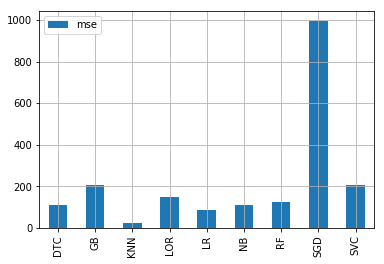

In [66]:
df_T.plot(kind='bar', grid=True);